# Project: Titanic_Machine Learning from Disaster

In [2]:
import pandas as pd
import numpy as np

In [3]:
train_df= pd.read_csv("./titanic/train.csv")
test_df= pd.read_csv("./titanic/test.csv")

In [4]:
train_df= pd.read_csv("./titanic/train.csv",index_col = 'PassengerId')
train_df.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
test_df= pd.read_csv("./titanic/test.csv",index_col = 'PassengerId')
test_df.head()

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,
892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


# 1. Feature Classification: Categorical vs Numerical
* This helps us select the appropriate plots for visualization.
### Which features are categorical?
* Categorical Features: nominal, ordinal, ratio, interval
* To classify the samples into sets of similar samples
### Which features are numerical?
* Numerical features: discrete, continuous, or timeseries
* These values change from sample to sample


In [7]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 891 entries, 1 to 891
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Name      891 non-null    object 
 3   Sex       891 non-null    object 
 4   Age       714 non-null    float64
 5   SibSp     891 non-null    int64  
 6   Parch     891 non-null    int64  
 7   Ticket    891 non-null    object 
 8   Fare      891 non-null    float64
 9   Cabin     204 non-null    object 
 10  Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 83.5+ KB


In [8]:
# chuyển đổi kiểu dữ liệu 
train_df["Survived"]=train_df["Survived"].astype("category")

In [9]:
train_df["Survived"].dtype

CategoricalDtype(categories=[0, 1], ordered=False, categories_dtype=int64)

In [10]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 891 entries, 1 to 891
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   Survived  891 non-null    category
 1   Pclass    891 non-null    int64   
 2   Name      891 non-null    object  
 3   Sex       891 non-null    object  
 4   Age       714 non-null    float64 
 5   SibSp     891 non-null    int64   
 6   Parch     891 non-null    int64   
 7   Ticket    891 non-null    object  
 8   Fare      891 non-null    float64 
 9   Cabin     204 non-null    object  
 10  Embarked  889 non-null    object  
dtypes: category(1), float64(2), int64(3), object(5)
memory usage: 77.6+ KB


In [11]:
features = ["Pclass", "Sex","SibSp","Parch","Embarked"]
def convert_cat(df,features):
    for feature in features:
        df[feature]=df[feature].astype("category")
convert_cat(train_df,features)
convert_cat(test_df,features)

In [12]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 891 entries, 1 to 891
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   Survived  891 non-null    category
 1   Pclass    891 non-null    category
 2   Name      891 non-null    object  
 3   Sex       891 non-null    category
 4   Age       714 non-null    float64 
 5   SibSp     891 non-null    category
 6   Parch     891 non-null    category
 7   Ticket    891 non-null    object  
 8   Fare      891 non-null    float64 
 9   Cabin     204 non-null    object  
 10  Embarked  889 non-null    category
dtypes: category(6), float64(2), object(3)
memory usage: 48.2+ KB


# Distribution of Numberical feature values across the samples

In [14]:
train_df.describe()

,Age,Fare
count,714.000000,891.000000
mean,29.699118,32.204208
std,14.526497,49.693429
min,0.420000,0.000000
25%,20.125000,7.910400
50%,28.000000,14.454200
75%,38.000000,31.000000
max,80.000000,512.329200


# Distribution of Categorical features

In [16]:
train_df.describe(include=['category'])

,Survived,Pclass,Sex,SibSp,Parch,Embarked
count,891,891,891,891,891,889
unique,2,3,2,7,7,3
top,0,3,male,0,0,S
freq,549,491,577,608,678,644


# 3.1. Correlating categorical features

* - Categorical: Survived, Sex, Embarked, Pclass (ordinal), SibSp, Parch

# Target Variable: Survived


In [18]:
train_df["Survived"].value_counts().to_frame()

,count
Survived,
0,549
1,342


In [19]:
train_df["Survived"].value_counts(normalize = True).to_frame()

,proportion
Survived,
0,0.616162
1,0.383838


* Only 38% survived the disaster. So the training data suffers from data imbalance but it is not severe which is why I will not consider techniques like sampling to tackle the imbalance.
# Sex


In [21]:
train_df["Sex"].value_counts().to_frame()

,count
Sex,
male,577
female,314


In [22]:
# import lib
import matplotlib.pyplot as plt
import seaborn as sns

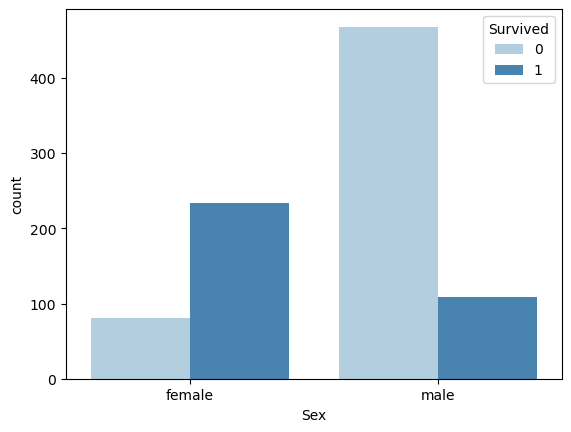

In [23]:
sns.countplot(data = train_df,hue = 'Survived',x='Sex',palette = 'Blues');

* Remaining Categorical Feature Columns

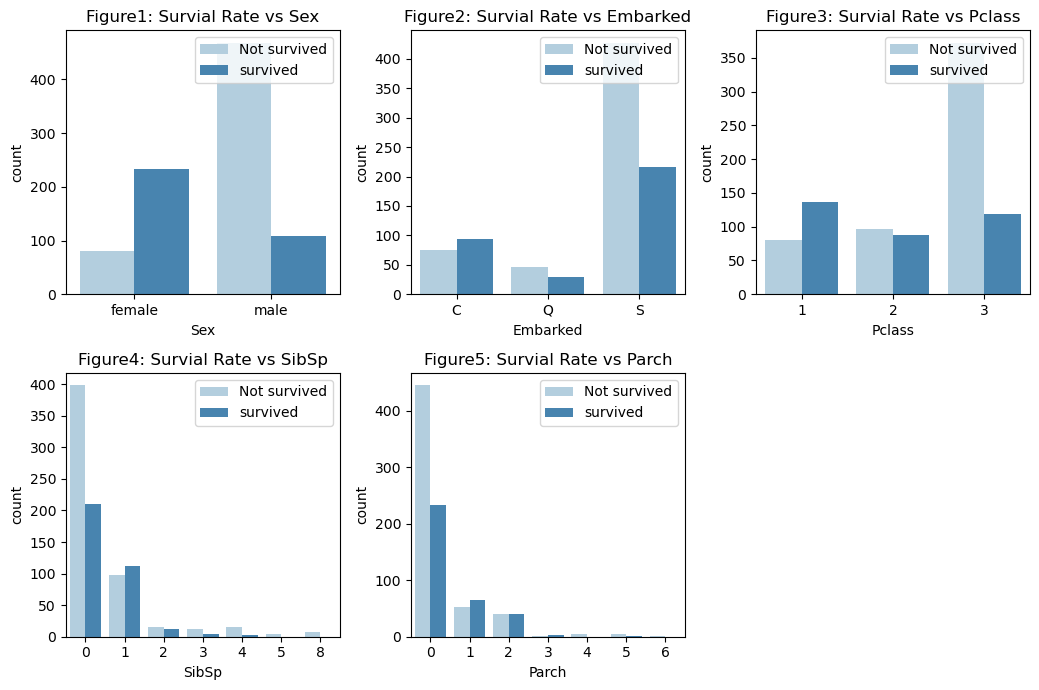

In [25]:
cols = ['Sex','Embarked','Pclass','SibSp','Parch']
n_rows = 2
n_cols = 3
fig,ax = plt.subplots(n_rows,n_cols, figsize= (n_cols*3.5,n_rows*3.5))

for r in range(0,n_rows):
    for c in range(0,n_cols):
        i = r*n_cols +c
        if i<len(cols):
            ax_i = ax[r,c]
            sns.countplot(data= train_df,x = cols[i],hue ='Survived',ax= ax_i, palette = 'Blues')
            ax_i.set_title(f"Figure{i+1}: Survial Rate vs {cols[i]}")
            ax_i.legend(title="", loc = 'upper right',labels =["Not survived","survived"] )
ax.flat[-1].set_visible(False)
plt.tight_layout()

#  3.2 EDA for Numerical Features
* Numerical feature : Age, Fare

### Age

<Axes: xlabel='Age', ylabel='Count'>

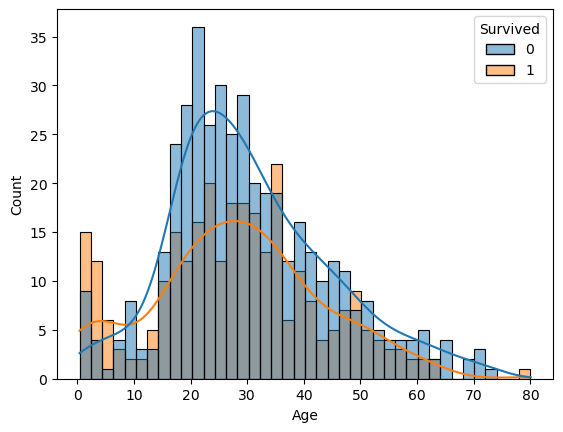

In [28]:
sns.histplot(data = train_df, x ='Age',hue ='Survived', bins = 40, kde = True)

### Fare

In [30]:
train_df["Fare"].describe()

count    891.000000
mean      32.204208
std       49.693429
min        0.000000
25%        7.910400
50%       14.454200
75%       31.000000
max      512.329200
Name: Fare, dtype: float64

<Axes: xlabel='Fare', ylabel='Count'>

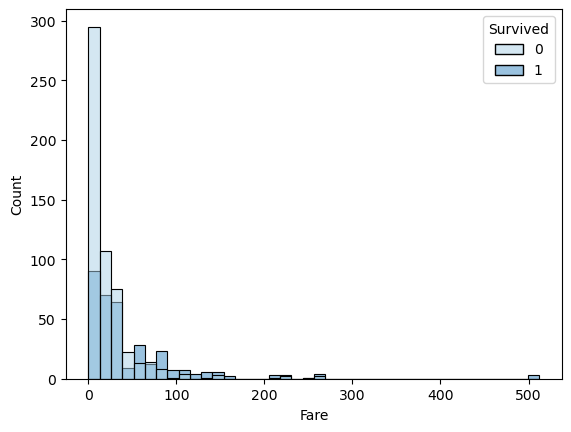

In [31]:
sns.histplot(data = train_df, x ='Fare',hue ='Survived', bins = 40, palette = 'Blues')

<Axes: xlabel='Fare', ylabel='count'>

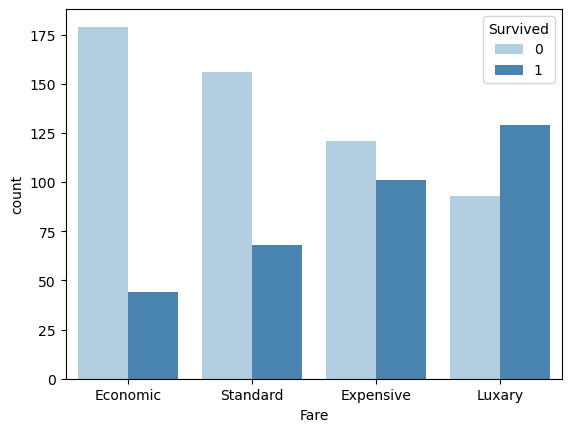

In [32]:
#  chia nho cac khoang
fare_categoties = ['Economic','Standard','Expensive','Luxary']
quartile_data = pd.qcut(train_df["Fare"],4, labels = fare_categoties)
sns.countplot(x=quartile_data,hue = train_df['Survived'], palette = "Blues")

# 4. Feature Engineering && Data Wrangling

 ### Name

In [35]:
train_df['Name'].tail(10)

PassengerId
882                          Markun, Mr. Johann
883                Dahlberg, Miss. Gerda Ulrika
884               Banfield, Mr. Frederick James
885                      Sutehall, Mr. Henry Jr
886        Rice, Mrs. William (Margaret Norton)
887                       Montvila, Rev. Juozas
888                Graham, Miss. Margaret Edith
889    Johnston, Miss. Catherine Helen "Carrie"
890                       Behr, Mr. Karl Howell
891                         Dooley, Mr. Patrick
Name: Name, dtype: object

In [36]:
import re #regular expression
def extract_title(name):
    p = re.compile(r",(.+)\.")
    return p.search(name).groups(1)[0].strip()
train_df['Title'] = train_df['Name'].apply(lambda name: extract_title(name))
train_df['Title'].value_counts()

Title
Mr                          517
Miss                        182
Mrs                         124
Master                       40
Dr                            7
Rev                           6
Col                           2
Mlle                          2
Major                         2
Ms                            1
Mrs. Martin (Elizabeth L      1
Lady                          1
Sir                           1
Mme                           1
Don                           1
Capt                          1
the Countess                  1
Jonkheer                      1
Name: count, dtype: int64

In [37]:
test_df['Title'] = test_df['Name'].apply(lambda name: extract_title(name))
test_df['Title'].value_counts()

Title
Mr        240
Miss       78
Mrs        72
Master     21
Col         2
Rev         2
Ms          1
Dr          1
Dona        1
Name: count, dtype: int64

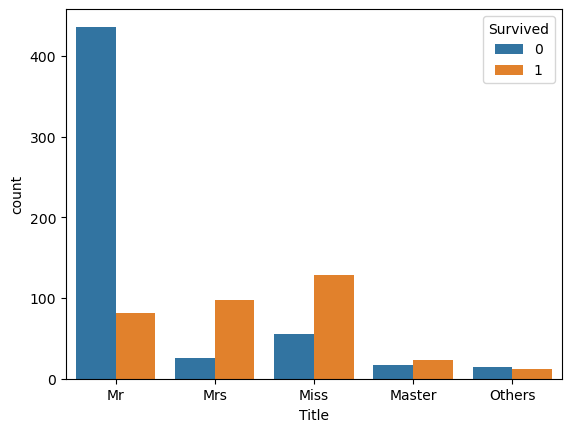

In [38]:
def group_title(title):
    if title in ['Mr','Mrs','Miss','Master']:
        return title
    elif title == "Ms":
        return "Miss"
    else:
        return "Others"
train_df['Title'] = train_df['Title'].apply(lambda title: group_title(title))
test_df['Title'] = test_df['Title'].apply(lambda title: group_title(title))

sns.countplot(data = train_df, x = 'Title', hue = 'Survived');

# Family
* SibSp,Parch

In [40]:
train_df['Family_size'] = train_df['SibSp'].astype('int') + train_df['Parch'].astype('int') +1
test_df['Family_size'] = train_df['SibSp'].astype('int') + train_df['Parch'].astype('int') +1

In [41]:
train_df['Family_Cat'] = pd.cut(train_df['Family_size'], bins = [0,1,4,6,20], labels = ['Solo','Small','Medium','Large'])
test_df['Family_Cat'] = pd.cut(train_df['Family_size'], bins = [0,1,4,6,20], labels = ['Solo','Small','Medium','Large'])

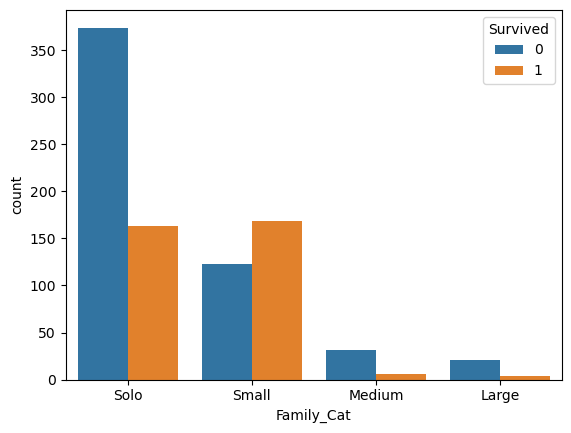

In [42]:
sns.countplot(data = train_df, x = 'Family_Cat', hue = 'Survived');

# 4.2 Data Wrangling

In [44]:
num_features = ['Age', 'Fare']
cat_features = ['Sex', 'Pclass','Embarked','Title','Family_Cat']
feature_cols = num_features + cat_features
feature_cols

['Age', 'Fare', 'Sex', 'Pclass', 'Embarked', 'Title', 'Family_Cat']

In [45]:
# viết 1 hàm để ?
def display_missing(df,feature_cols):
    n_rows = df.shape[0]
    for col in feature_cols:
        missing_count = df[col].isnull().sum()
        if missing_count > 0:
            print(f"{col} has {missing_count*100/n_rows:.2f}% missing value")
display_missing(train_df, feature_cols)
display_missing(test_df, feature_cols)

Age has 19.87% missing value
Embarked has 0.22% missing value
Age has 20.57% missing value
Fare has 0.24% missing value
Family_Cat has 100.00% missing value


# Filling missing values
### Age 
* Filling missing values with median of whole dataset 

In [47]:
age_by_sex_pclass = train_df.groupby(['Sex', 'Pclass']).median(numeric_only=True)['Age']
age_by_sex_pclass

C:\Users\HuynhQuyen\AppData\Local\Temp\ipykernel_17640\2400745918.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  age_by_sex_pclass = train_df.groupby(['Sex', 'Pclass']).median(numeric_only=True)['Age']


Sex     Pclass
female  1         35.0
        2         28.0
        3         21.5
male    1         40.0
        2         30.0
        3         25.0
Name: Age, dtype: float64

In [48]:
# Filling missing values in Age with the medians of Sex and Pclass group
train_df['Age'] = train_df.groupby(['Sex', 'Pclass'])['Age'].transform(lambda x: x.fillna(x.median()))
test_df['Age'] = test_df.groupby(['Sex', 'Pclass'])['Age'].transform(lambda x: x.fillna(x.median()))


C:\Users\HuynhQuyen\AppData\Local\Temp\ipykernel_17640\2174393554.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  train_df['Age'] = train_df.groupby(['Sex', 'Pclass'])['Age'].transform(lambda x: x.fillna(x.median()))
C:\Users\HuynhQuyen\AppData\Local\Temp\ipykernel_17640\2174393554.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  test_df['Age'] = test_df.groupby(['Sex', 'Pclass'])['Age'].transform(lambda x: x.fillna(x.median()))


In [49]:
display_missing(train_df, feature_cols)
display_missing(test_df, feature_cols)


Embarked has 0.22% missing value
Fare has 0.24% missing value
Family_Cat has 100.00% missing value


In [50]:
X = train_df[feature_cols]
y = train_df['Survived']
x_test = test_df[feature_cols]

In [51]:
# preprocess pipeline
from sklearn.preprocessing import OneHotEncoder,StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline 

num_transformer = Pipeline(steps = [
    ('impute', SimpleImputer(strategy = 'median')),
    ('scaler', StandardScaler())
])
cat_transformer = Pipeline(steps = [
    ('impute', SimpleImputer(strategy = 'most_frequent')),
    ('encoder', OneHotEncoder(handle_unknown = 'ignore'))
])

In [52]:
preprocessor = ColumnTransformer(transformers = [
    ('num', num_transformer, num_features),
    ('cat', cat_transformer, cat_features)

])

In [53]:
preprocessor.fit(X)

ColumnTransformer(transformers=[('num',
                                 Pipeline(steps=[('impute',
                                                  SimpleImputer(strategy='median')),
                                                 ('scaler', StandardScaler())]),
                                 ['Age', 'Fare']),
                                ('cat',
                                 Pipeline(steps=[('impute',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('encoder',
                                                  OneHotEncoder(handle_unknown='ignore'))]),
                                 ['Sex', 'Pclass', 'Embarked', 'Title',
                                  'Family_Cat'])])

In [54]:
x = preprocessor.transform(X)

In [55]:
x_test = preprocessor.transform(x_test)

# 5. Model Training 

In [57]:
from sklearn.model_selection import train_test_split

x_train,x_value, y_train, y_value = train_test_split(x,y,test_size = 0.2)

In [58]:
x_train.shape, x_value.shape

((712, 19), (179, 19))

In [59]:
x_test.shape

(418, 19)

In [128]:
# binary classification
from sklearn.preprocessing import PolynomialFeatures
# import model
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import precision_score, recall_score, classification_report, confusion_matrix

In [61]:
log_reg = LogisticRegression(solver = 'liblinear',max_iter = 1000)
log_reg.fit(x_train,y_train)

LogisticRegression(max_iter=1000, solver='liblinear')

In [62]:
log_reg.score(x_value, y_value)

0.7988826815642458

In [63]:
y_pred = log_reg.predict(x_value)

In [64]:
precision_score(y_value,y_pred), recall_score(y_value,y_pred)
print(classification_report(y_value,y_pred))

              precision    recall  f1-score   support

           0       0.83      0.86      0.84       111
           1       0.75      0.71      0.73        68

    accuracy                           0.80       179
   macro avg       0.79      0.78      0.78       179
weighted avg       0.80      0.80      0.80       179



In [130]:
# PolynomialFeatures
poly = PolynomialFeatures(degree = 2)
poly_features_x_train = poly.fit_transform(x_train)
poly_features_x_value = poly.transform(x_value)

In [122]:
poly_log_reg = LogisticRegression(solver= 'liblinear', max_iter = 1000)

In [124]:
poly_log_reg.fit(poly_features_x_train, y_train)

LogisticRegression(max_iter=1000, solver='liblinear')

In [126]:
poly_log_reg.score(poly_features_x_value, y_value)

0.8044692737430168

In [136]:
# Decision Tree
desision_tree = DecisionTreeClassifier(criterion= 'entropy', max_depth = 8 , random_state = 2022)
desision_tree.fit(x_train,y_train)
desision_tree.score(x_value,y_value)

0.8268156424581006

# 5.1 Cross-validation

In [139]:
from sklearn.model_selection import cross_val_score
log_reg_cv = LogisticRegression(solver= 'liblinear', max_iter = 1000)
dt_cv = DecisionTreeClassifier(criterion= 'entropy', max_depth = 8 , random_state = 2022)


In [145]:
lr_scores = cross_val_score(log_reg_cv,x,y,scoring = 'accuracy', cv = 5)
lr_scores.mean(), lr_scores.std()


(0.826031008725127, 0.020466357172416235)

In [147]:
dt_scores = cross_val_score(dt_cv,x,y,scoring = 'accuracy', cv = 5)
dt_scores.mean(), dt_scores.std()

(0.8058565061829139, 0.014166324570742463)